# Loading Libraries for the Code

In [13]:
# Loading Libaries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import os

# Define the folder name
folder_name = "Data"

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'Data' already exists.


In [14]:
def plot_XY(x_values, y_values, x_title, y_title, title, img_name):
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust the figure size

    # Plot the line chart
    plt.plot(x_values, y_values, marker='o', label='Data Points')

    # Add labels to the points
    for i in range(len(x_values)):
        plt.annotate("",(x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    # Set axis labels

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    # Set plot title
    plt.title(title, pad=20)  # Increase pad to adjust distance from plot

    # Add a legend
    plt.legend()

    # Remove the grid
    plt.grid(False)

    # Save the image
    str1 = f"{folder_name}/plot_{img_name}.png"
    plt.savefig(str1)

    # Display the plot
    plt.show()


# 1. Load Data

In [15]:
# Loading the Boston Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,
:2]])
boston_target = raw_df.values[1::2, 2]

In [16]:
print(boston_data.shape)

(506, 13)


In [17]:
print(boston_target.shape)

(506,)


In [18]:
boston_data.shape

(506, 13)

In [19]:
# Assuming the targe  t values are in the last column (13th column)
features = boston_data[:, :-1]   # All columns except the last one
targets = boston_data[:, -1]     # Last column

In [20]:
best_test_loss = float('inf')  # Initialize with a large value
loss_name = ""

## Split the Input Dataset into Training and Testing Dataset

In [21]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
# The random_state parameter ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Now X_train and y_train are the training features and target values, respectively
# X_test and y_test are the testing features and target values, respectively

# 2. Model

In [22]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Convert to PyTorch tensors Standardized
X_train_tensor_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor_scaled = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor_scaled = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the neural network class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], X_train.shape[0])
        self.layer2 = nn.Linear(X_train.shape[0], 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Instantiate the model
model = RegressionNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor_scaled)
    loss = criterion(outputs, y_train_tensor_scaled)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
# i. Training loss on the y-axis with epochs on the x-axis
# ii. Test loss on the y-axis with epochs on the x-axis
# iii. Training accuracy on the y-axis with epochs on the x-axis
# iv. Test accuracy on the y-axis with epochs on the x-axis

# train_loss_model = []
# epoch =
with torch.no_grad():
    y_pred = model(X_test_tensor_scaled)
    test_loss = criterion(y_pred, y_test_tensor_scaled)
    print(f'Test Loss: {test_loss.item():.4f}')
    if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{0.001}.pt')
            loss_name = "Adaptive Moment Estimation"
            print(f'New best test loss! Model checkpoint saved.')

Epoch [100/1000], Loss: 24.8453
Epoch [200/1000], Loss: 16.2596
Epoch [300/1000], Loss: 14.5161
Epoch [400/1000], Loss: 13.3719
Epoch [500/1000], Loss: 12.2588
Epoch [600/1000], Loss: 11.2040
Epoch [700/1000], Loss: 10.2649
Epoch [800/1000], Loss: 9.4779
Epoch [900/1000], Loss: 8.8242
Epoch [1000/1000], Loss: 8.2798
Test Loss: 19.6376
New best test loss! Model checkpoint saved.


# 3. Training Module

## Part A: With unnormalized data

### SGD optimizer with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

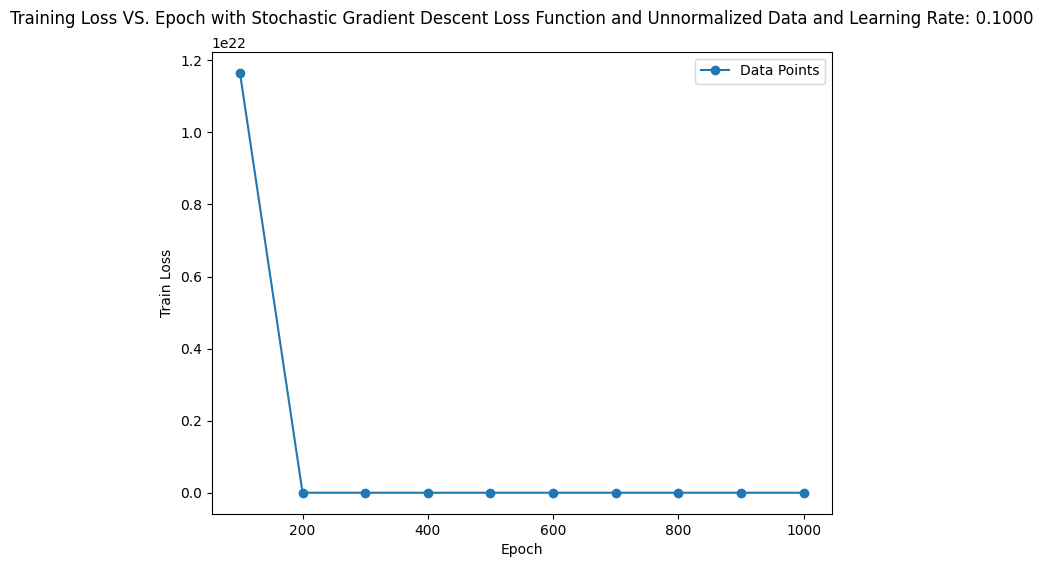

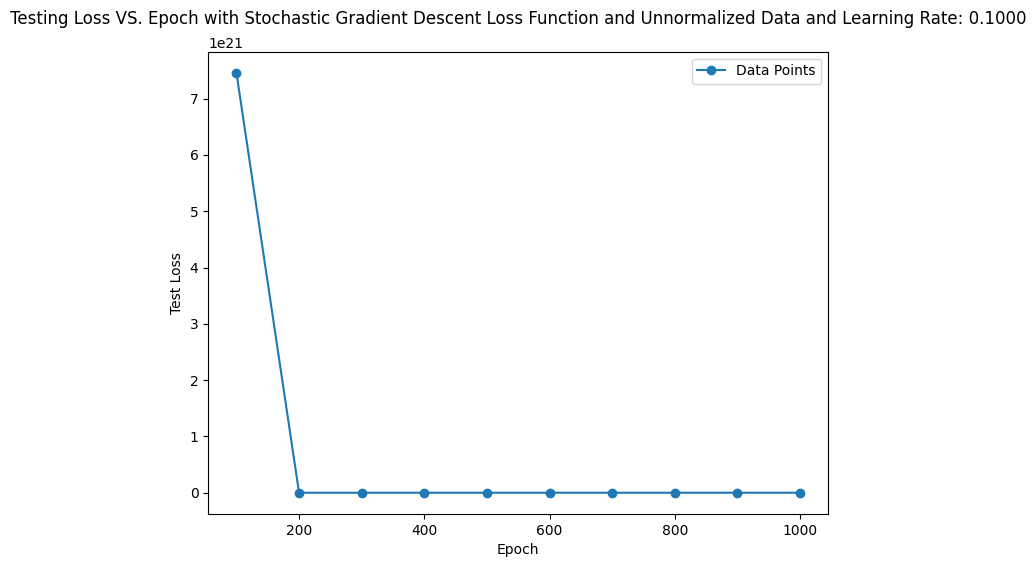

Learning Rate: 0.1000, Test Loss: 52.9123 Train Loss: 50.4324


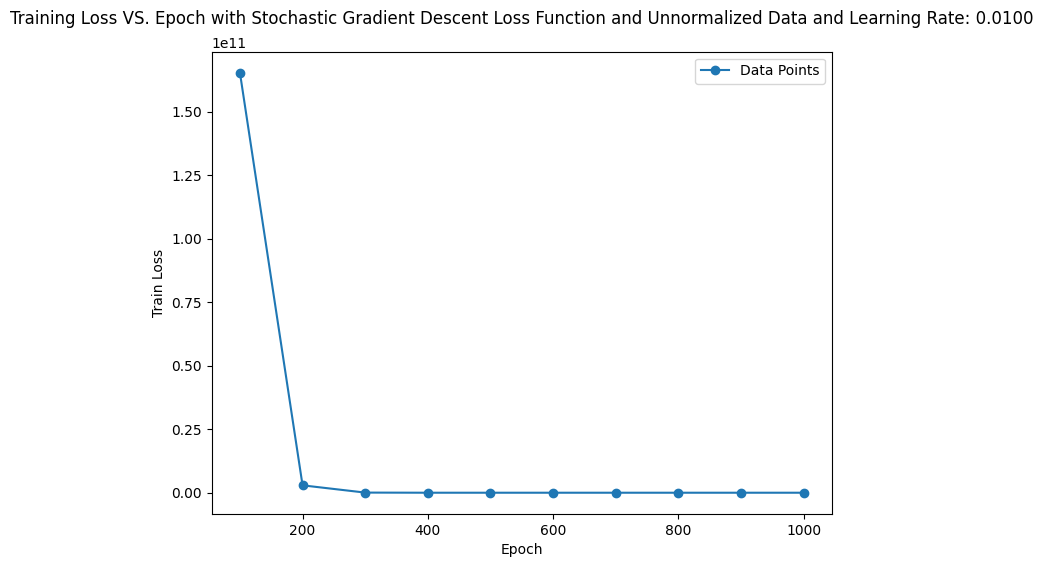

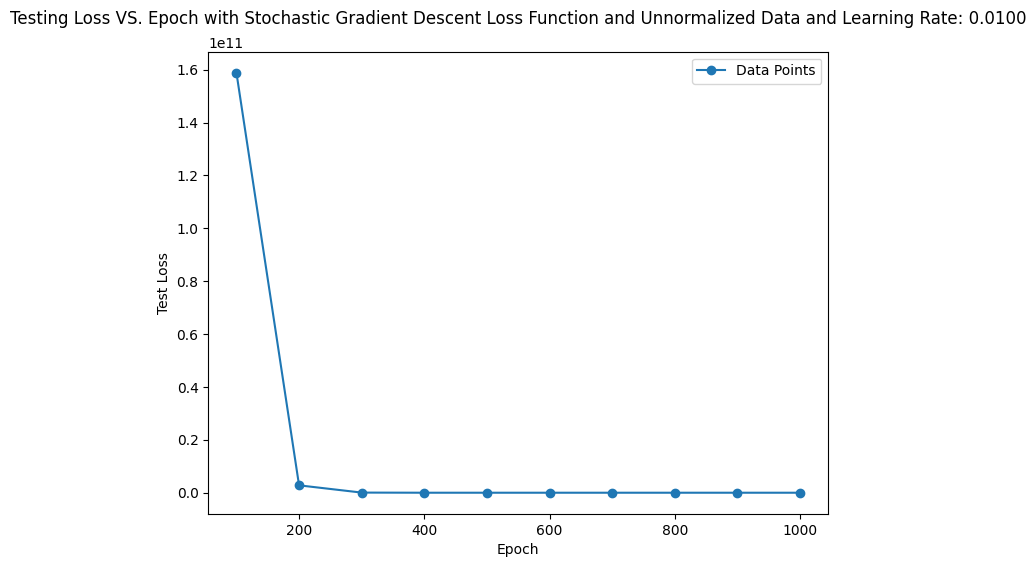

Learning Rate: 0.0100, Test Loss: 52.9222 Train Loss: 50.4324


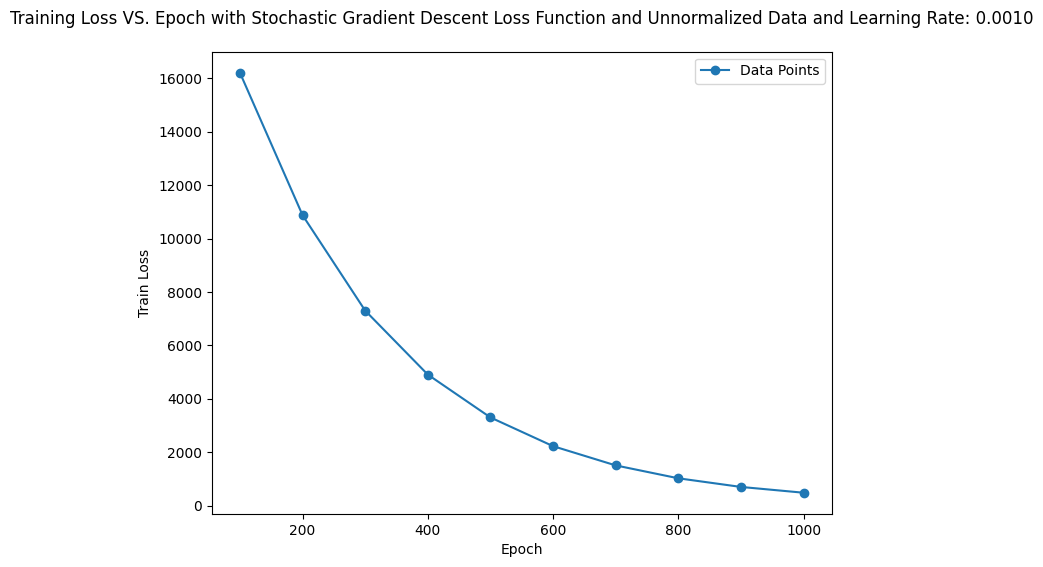

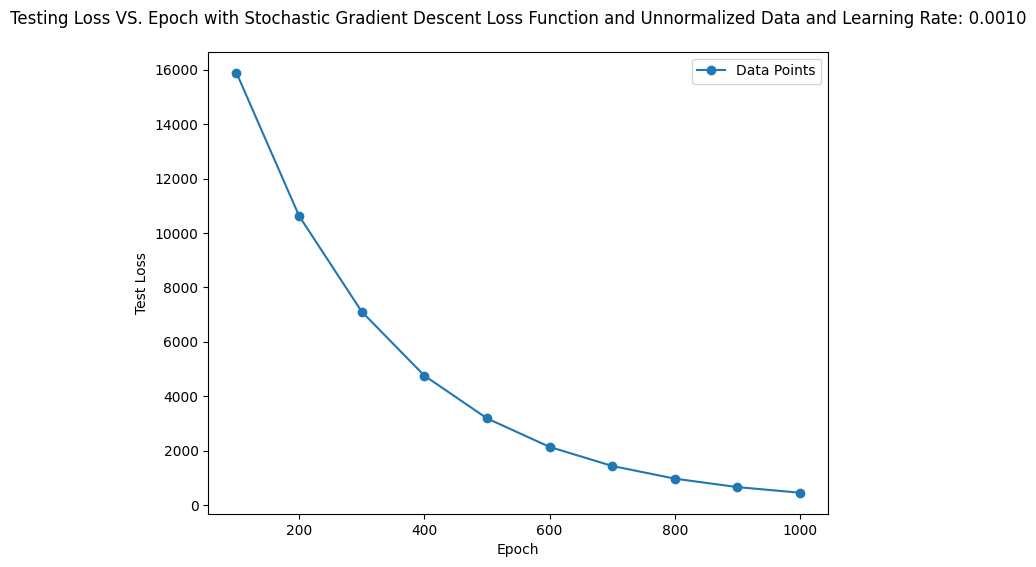

Learning Rate: 0.0010, Test Loss: 450.3147 Train Loss: 490.2324


In [25]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]

# Training loop

for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))

    plot_XY(epochs_array, train_loss, "Epoch", "Train Loss", f"Training Loss VS. Epoch with Stochastic Gradient Descent Loss Function and Unnormalized Data and Learning Rate: {lr:.4f}", f"Train_Sto_Unorm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Stochastic Gradient Descent Loss Function and Unnormalized Data and Learning Rate: {lr:.4f}", f"Test_Sto_Unorm_{lr:.4f}")

    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        print("="*50)
        # print(f'Learning Rate: {lr:.4f}, Epoch: {epoch+1}/{num_epochs}, '
        #           f'Training Loss: {loss.item():.4f}, Testing Loss: {test_loss.item():.4f}')
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{lr}.pt')
            loss_name = f"Stochastic Gradient Descent Loss Function and Unnormalized Data with Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')

### SGD optimizer with Nesterov parameter True and an initial momentum value that you feel is suitable with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

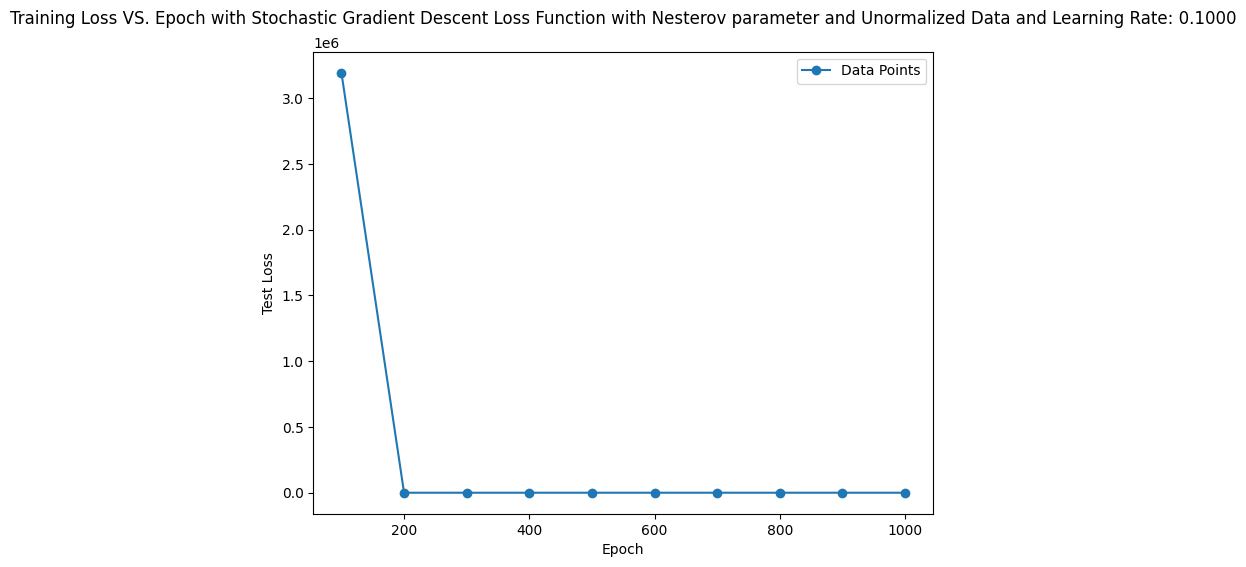

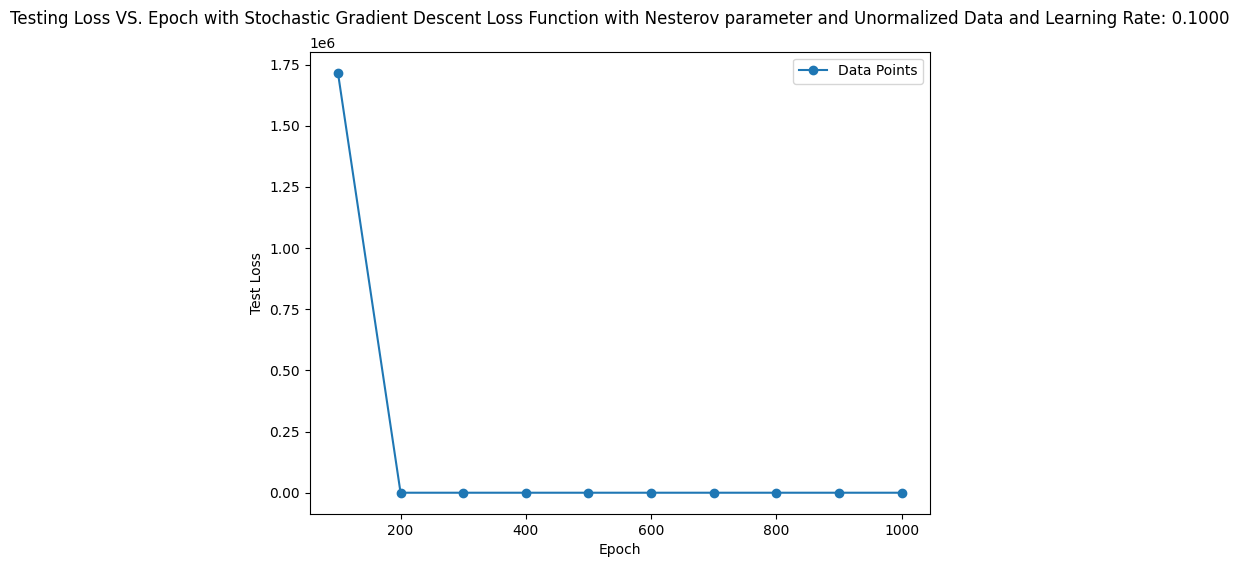

Learning Rate: 0.1000, Test Loss: 52.9123 Train Loss: 50.4324


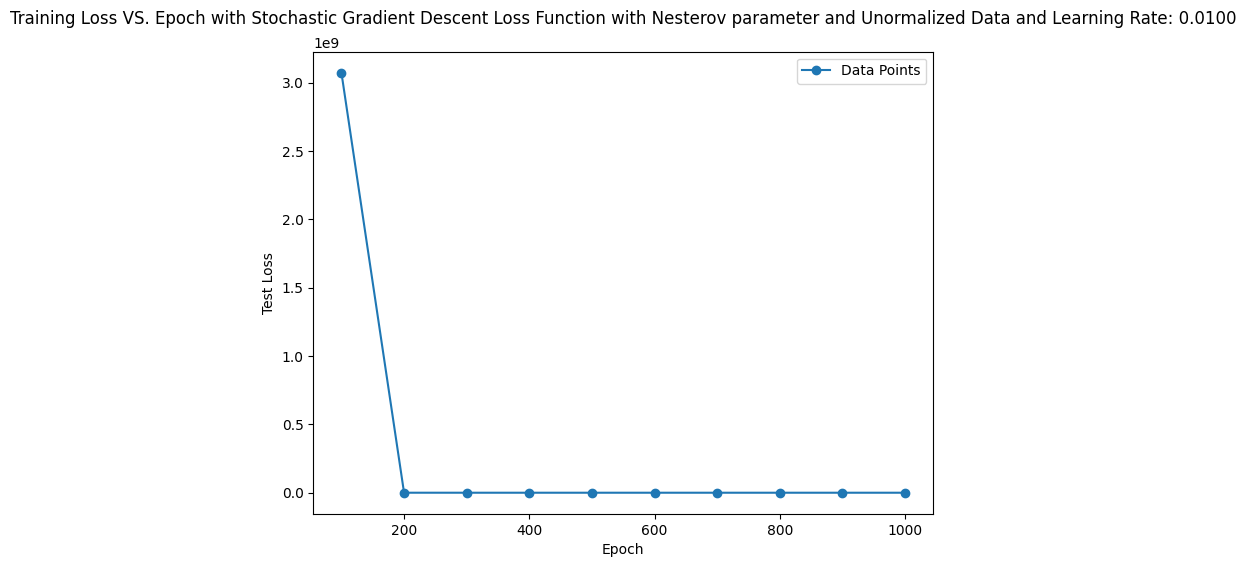

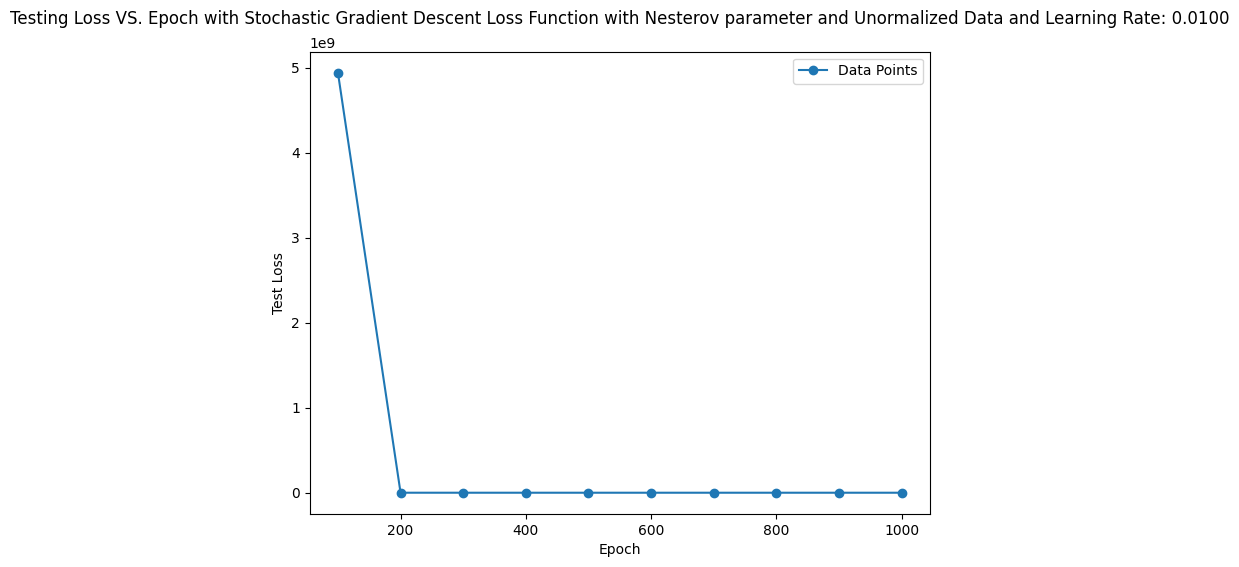

Learning Rate: 0.0100, Test Loss: 52.9123 Train Loss: 50.4324


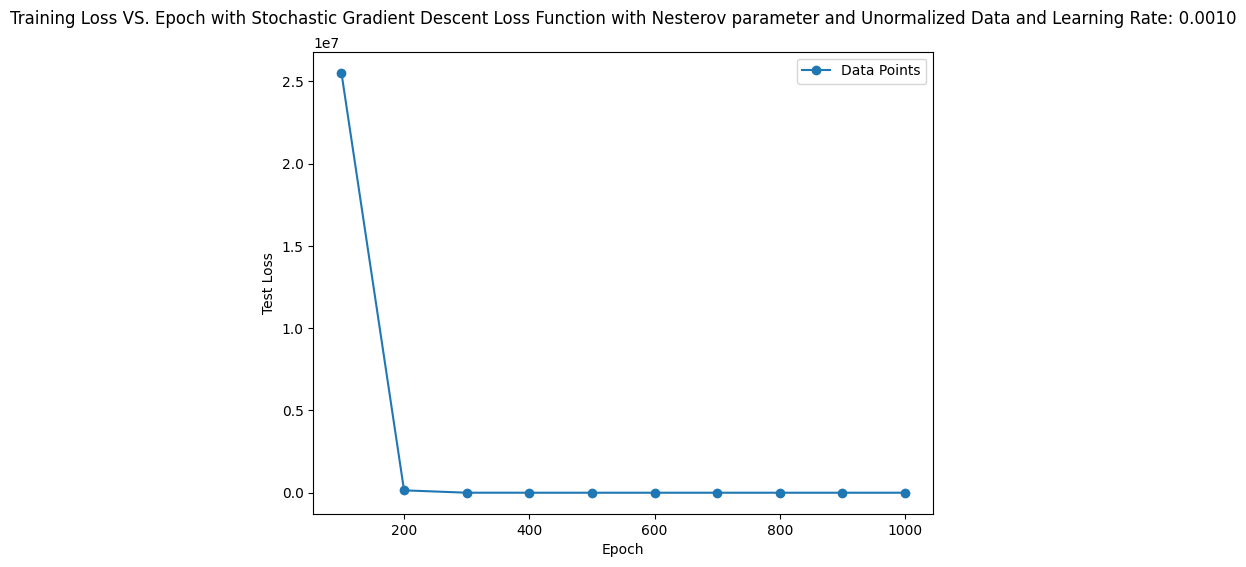

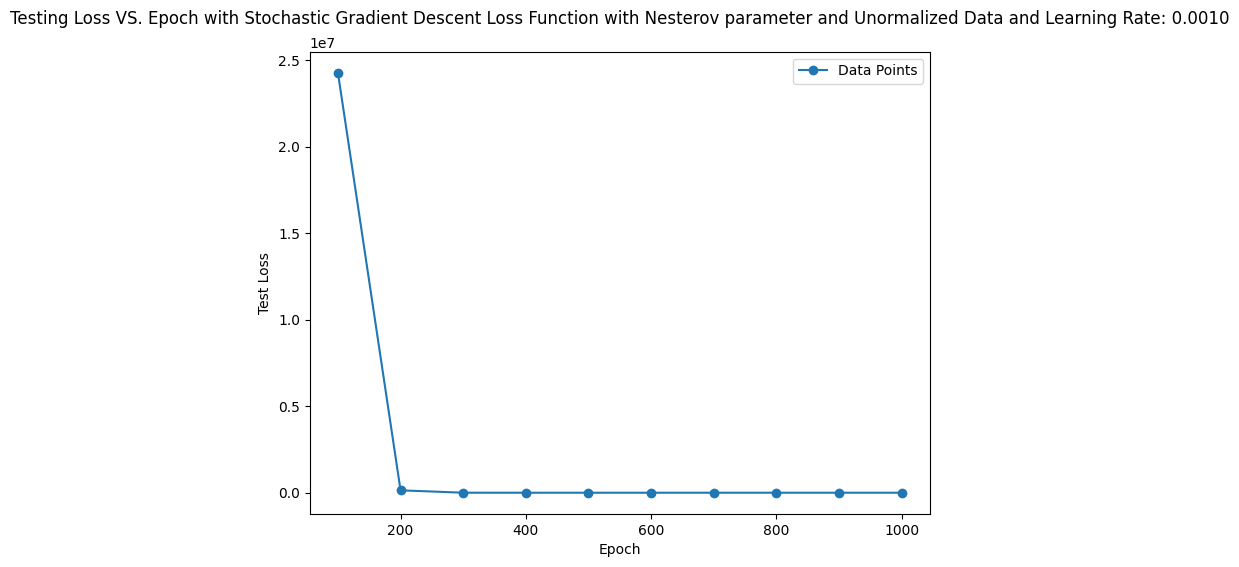

Learning Rate: 0.0010, Test Loss: 52.9123 Train Loss: 50.4324


In [26]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]
initial_momentum = 0.9
use_nesterov = True
# Training loop
for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=initial_momentum, nesterov=use_nesterov)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))

    plot_XY(epochs_array, train_loss, "Epoch", "Test Loss", f"Training Loss VS. Epoch with Stochastic Gradient Descent Loss Function with Nesterov parameter and Unormalized Data and Learning Rate: {lr:.4f}", f"Train_Sto_1_Unorm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Stochastic Gradient Descent Loss Function with Nesterov parameter and Unormalized Data and Learning Rate: {lr:.4f}", f"Test_Sto_1_Unorm_{lr:.4f}")
    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        print("="*50)
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{lr}.pt')
            loss_name = f"Stochastic Gradient Descent Loss Function with Nesterov parameter True and an Suitable Initial Momentum value and Unnormalized Data and Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')

### Adadelta optimizer with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

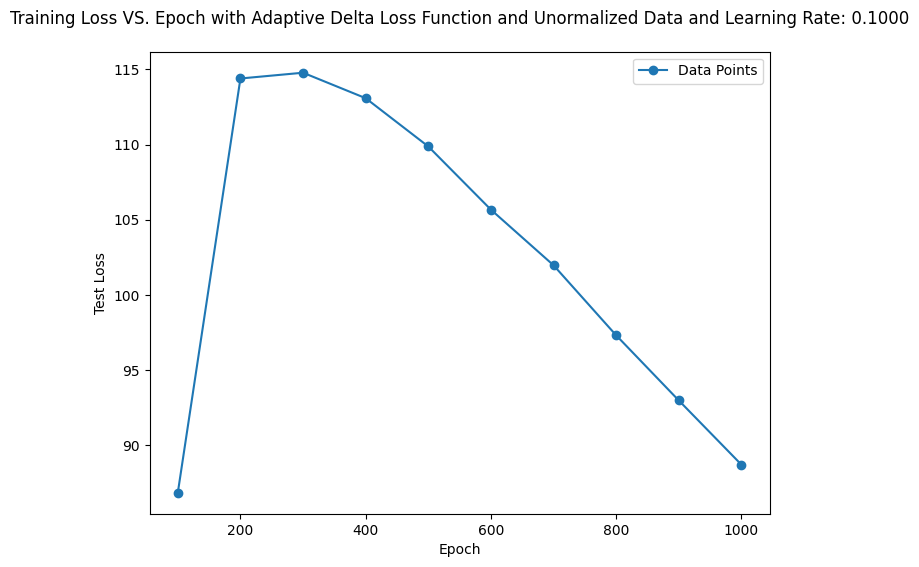

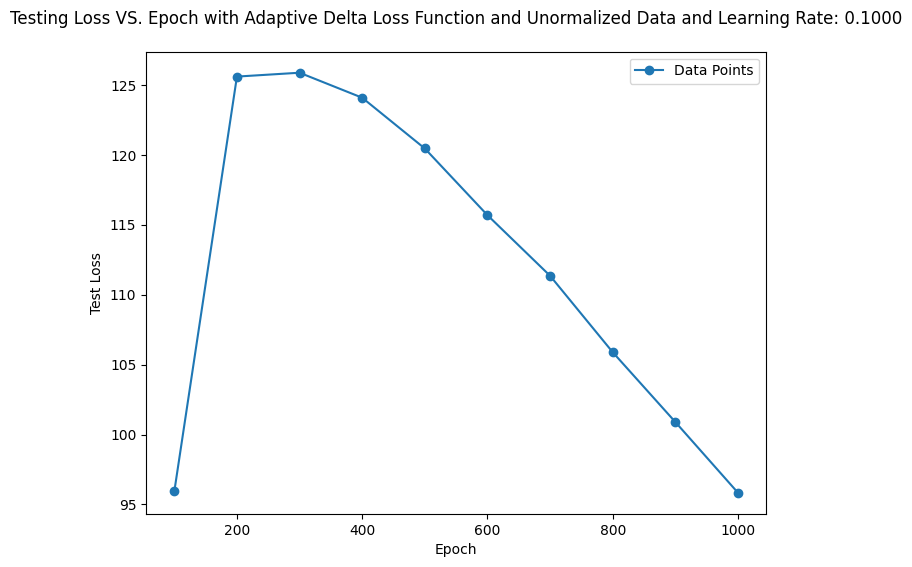

Learning Rate: 0.1000, Test Loss: 95.8364 Train Loss: 88.7176


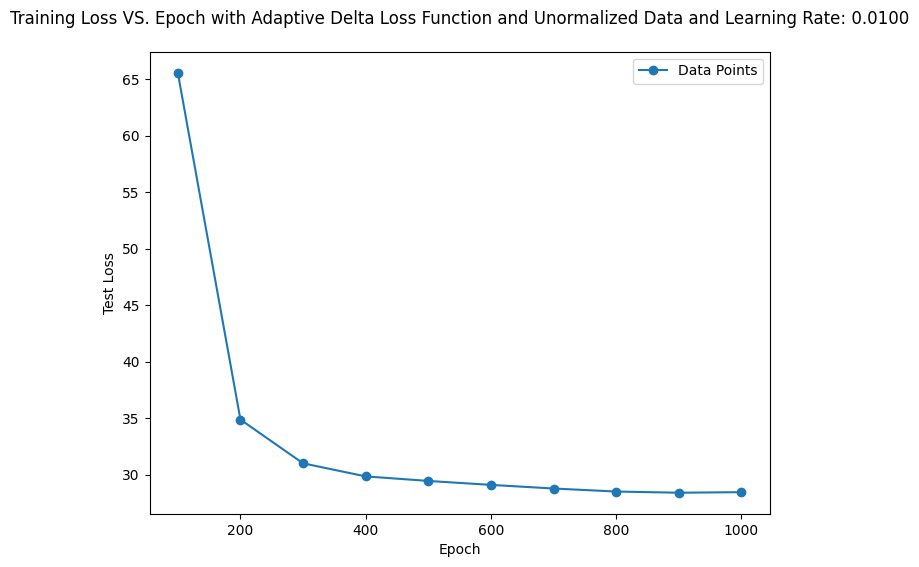

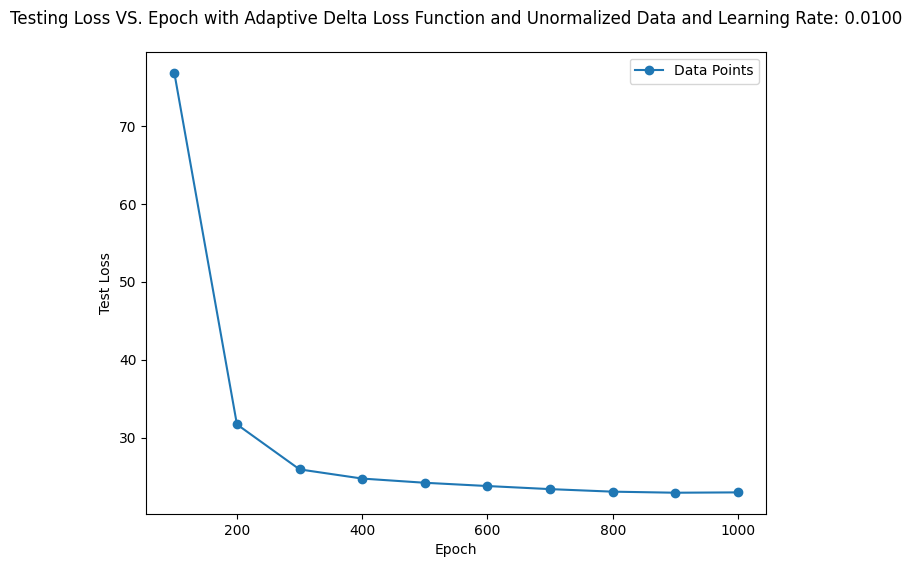

Learning Rate: 0.0100, Test Loss: 22.9567 Train Loss: 28.4567


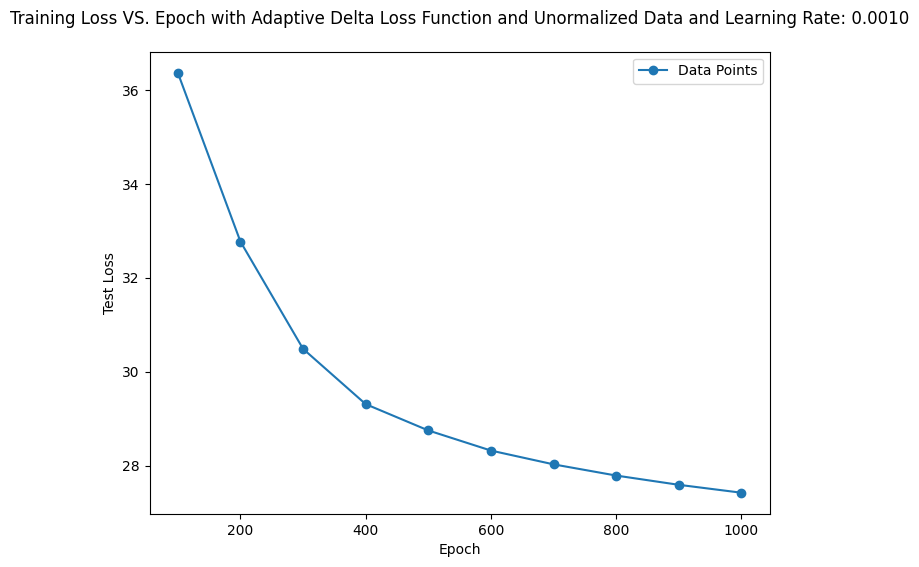

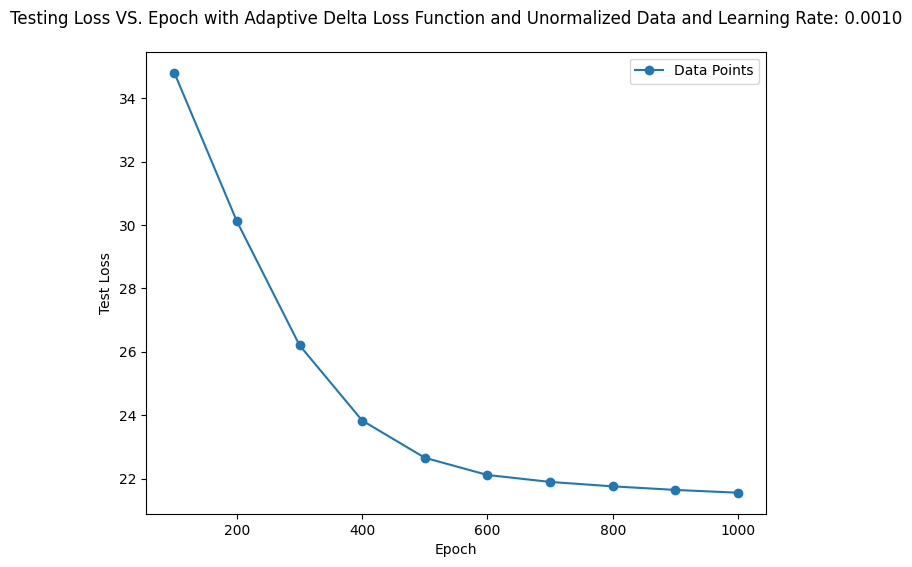

Learning Rate: 0.0010, Test Loss: 21.5525 Train Loss: 27.4248


In [27]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]

# Training loop
for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))
    plot_XY(epochs_array, train_loss, "Epoch", "Test Loss", f"Training Loss VS. Epoch with Adaptive Delta Loss Function and Unormalized Data and Learning Rate: {lr:.4f}", f"Train_Ada_Unorm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Adaptive Delta Loss Function and Unormalized Data and Learning Rate: {lr:.4f}", f"Test_Ada_Unorm_{lr:.4f}")

    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        print("="*50)
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint

            loss_name = f"Adaptive Delta Loss Function and Unnormalized Data and Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')

## Part B: With normalized data

### SGD optimizer with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

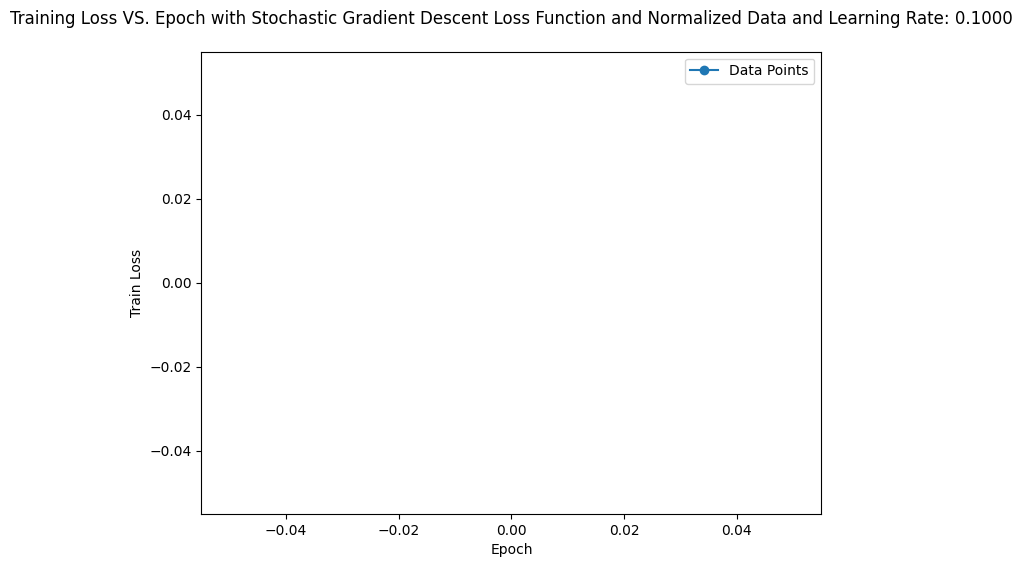

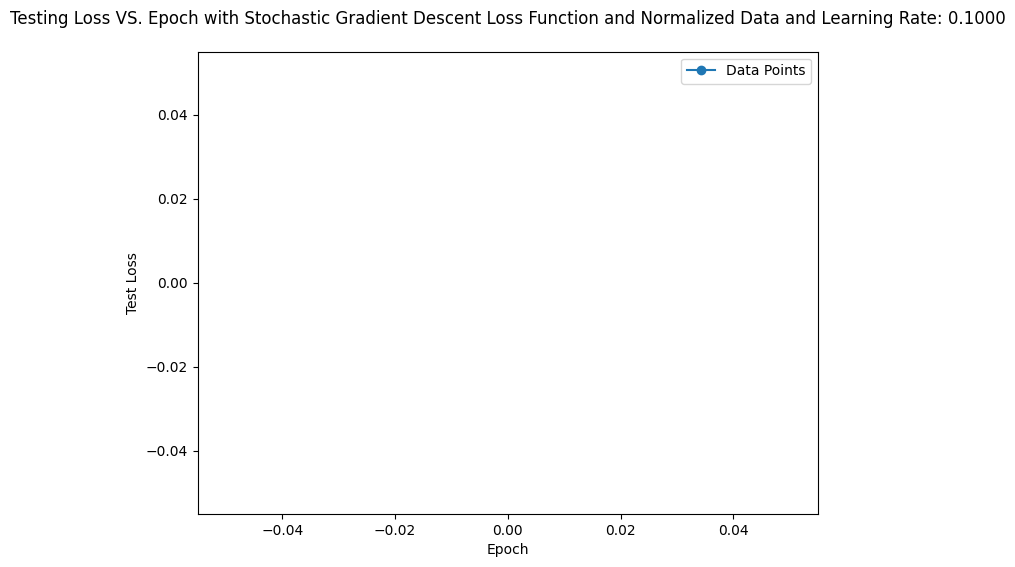

Learning Rate: 0.1000, Test Loss: nan Train Loss: nan


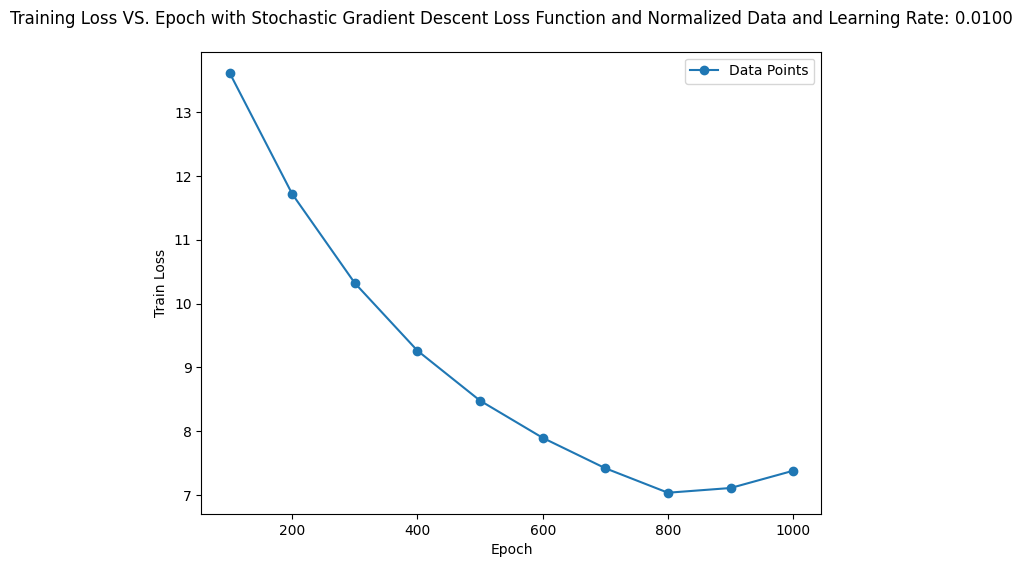

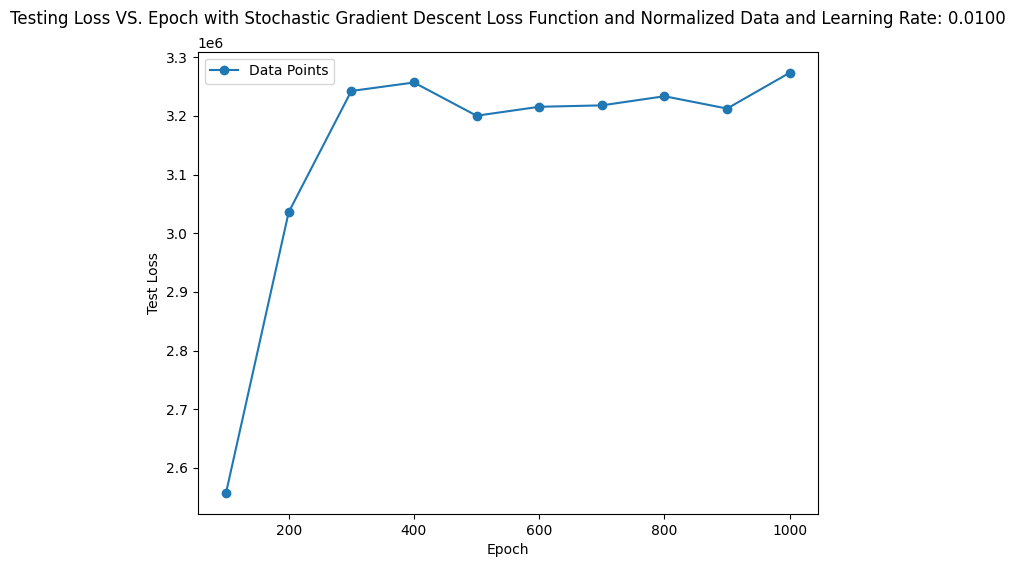

Learning Rate: 0.0100, Test Loss: 21.0194 Train Loss: 7.3823


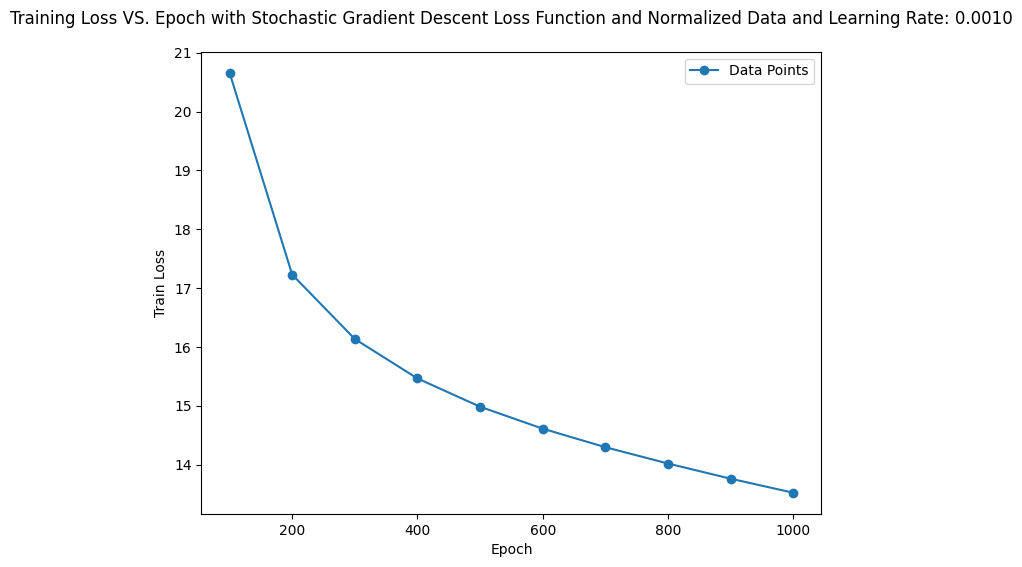

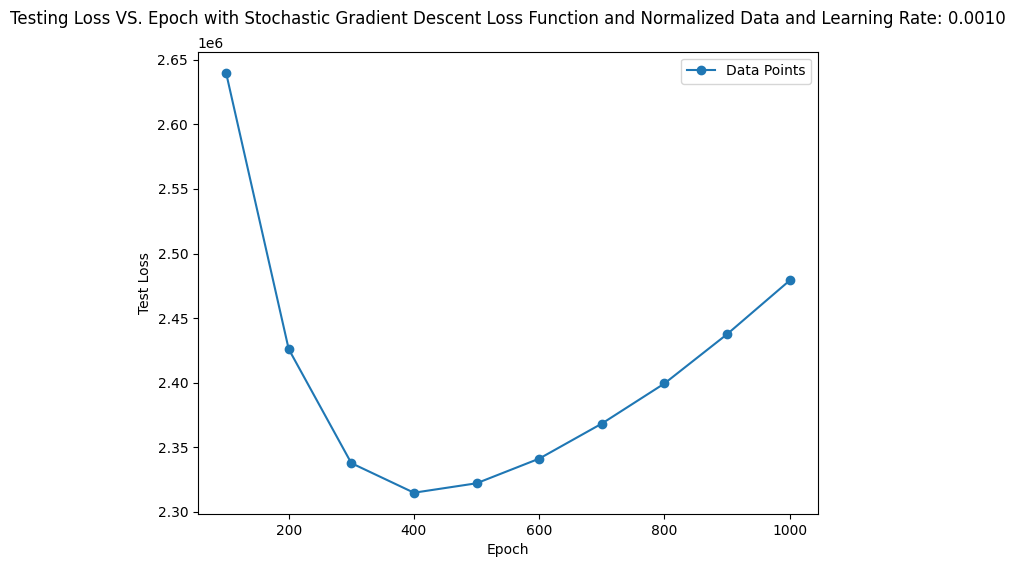

Learning Rate: 0.0010, Test Loss: 16.9173 Train Loss: 13.5249
New best test loss! Model checkpoint saved.


In [28]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]

# Training loop
for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor_scaled)
        loss = criterion(outputs, y_train_tensor_scaled)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))

    plot_XY(epochs_array, train_loss, "Epoch", "Train Loss", f"Training Loss VS. Epoch with Stochastic Gradient Descent Loss Function and Normalized Data and Learning Rate: {lr:.4f}", f"Train_Sto_Norm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Stochastic Gradient Descent Loss Function and Normalized Data and Learning Rate: {lr:.4f}", f"Test_Sto_Norm_{lr:.4f}")

    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor_scaled)
        test_loss = criterion(test_outputs, y_test_tensor_scaled)
        print("="*50)
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{lr}.pt')
            loss_name = f"Stochastic Gradient Descent Loss Function and Normalized Data with Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')


### SGD optimizer with Nesterov parameter True and an initial momentum value that you feel is suitable with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

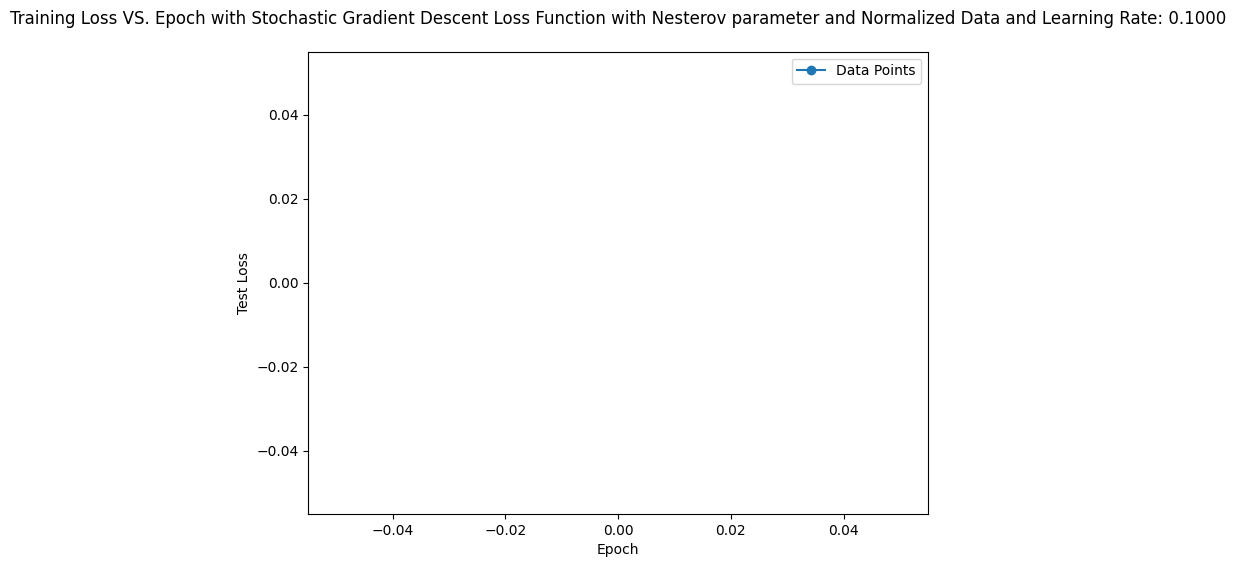

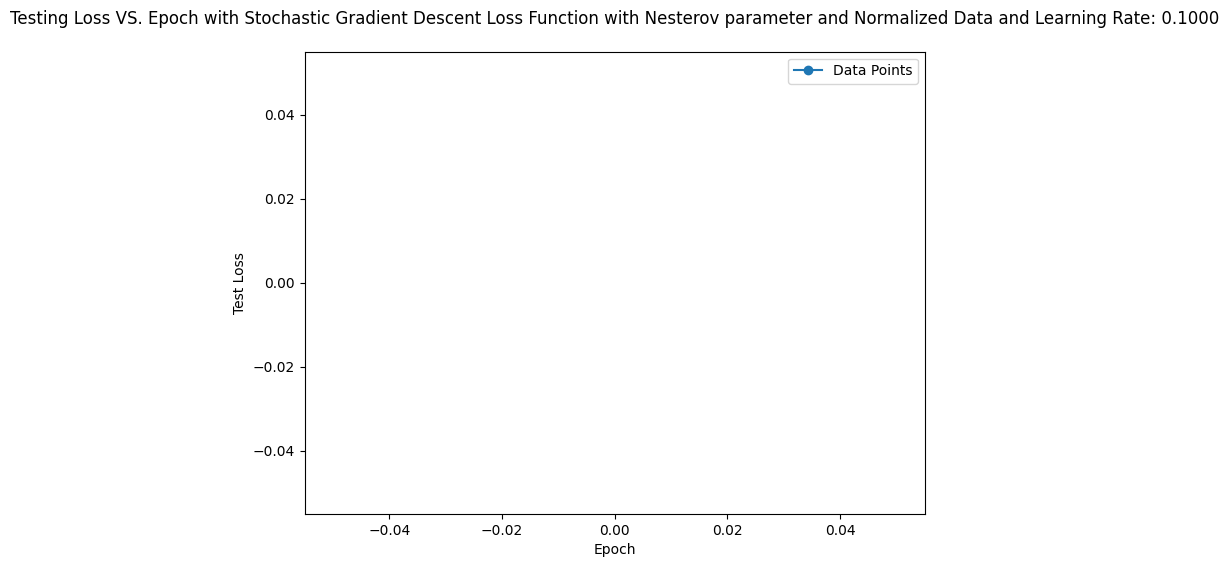

Learning Rate: 0.1000, Test Loss: nan Train Loss: nan


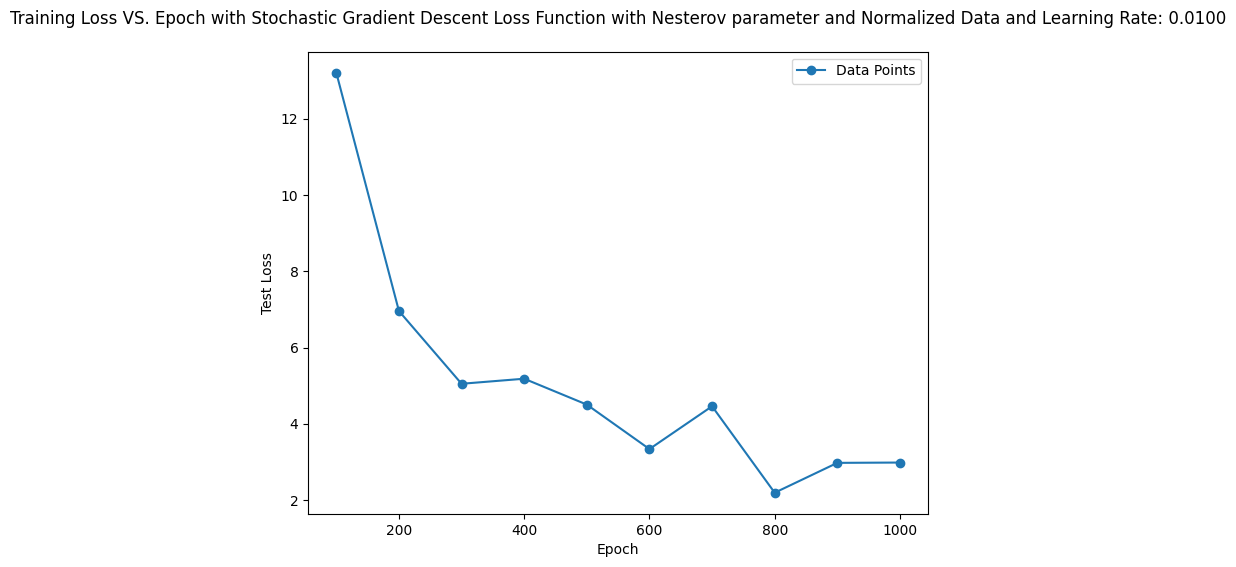

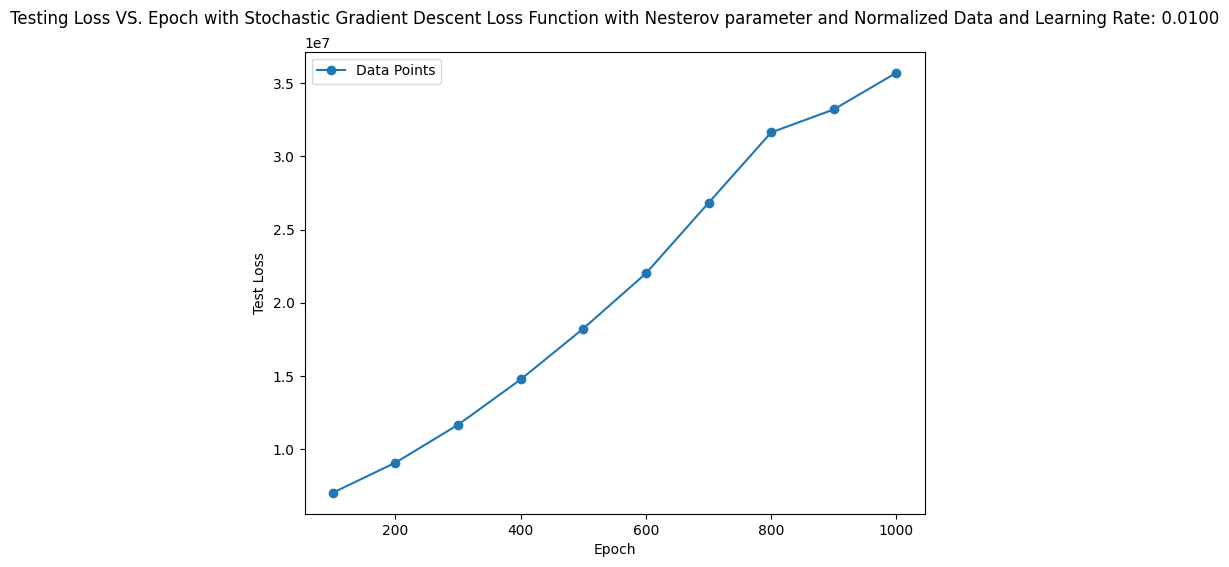

Learning Rate: 0.0100, Test Loss: 25.1124 Train Loss: 2.9833


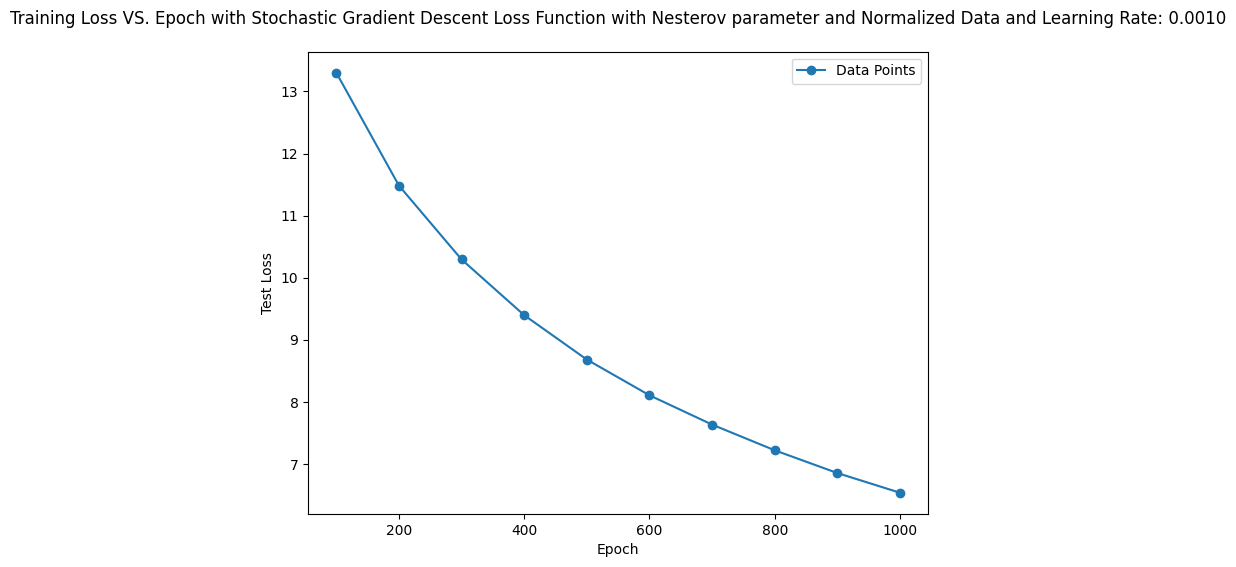

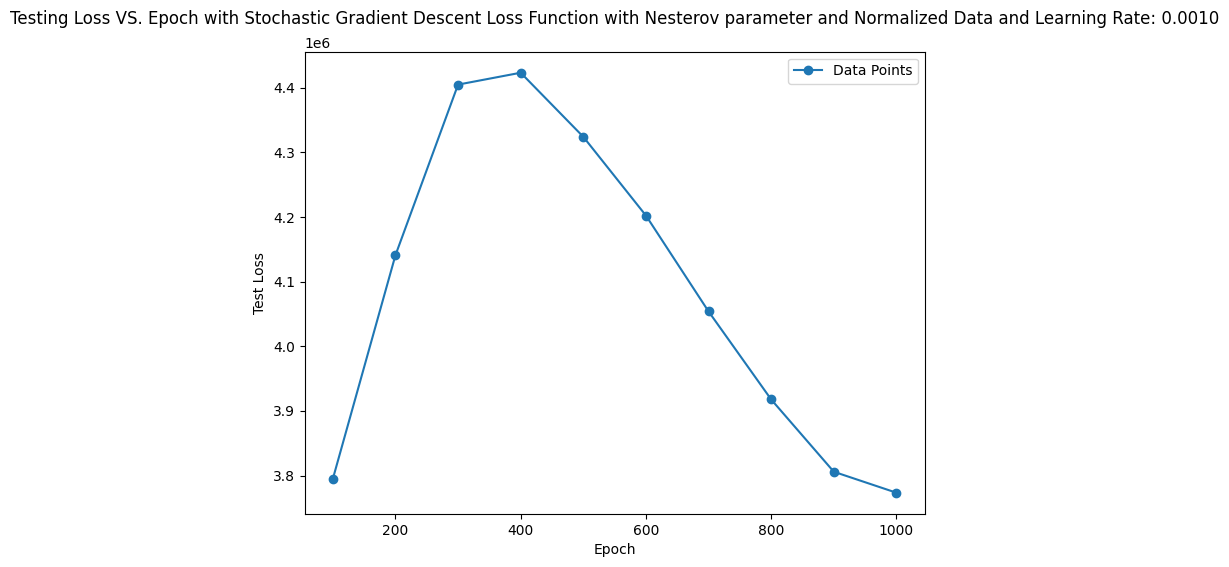

Learning Rate: 0.0010, Test Loss: 19.8844 Train Loss: 6.5388


In [29]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]
initial_momentum = 0.9
use_nesterov = True

# Training loop
for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=initial_momentum, nesterov=use_nesterov)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor_scaled)
        loss = criterion(outputs, y_train_tensor_scaled)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))

    plot_XY(epochs_array, train_loss, "Epoch", "Test Loss", f"Training Loss VS. Epoch with Stochastic Gradient Descent Loss Function with Nesterov parameter and Normalized Data and Learning Rate: {lr:.4f}", f"Train_Sto_1_Norm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Stochastic Gradient Descent Loss Function with Nesterov parameter and Normalized Data and Learning Rate: {lr:.4f}", f"Test_Sto_1_Norm_{lr:.4f}")
    # Evaluate on the test set
    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor_scaled)
        test_loss = criterion(test_outputs, y_test_tensor_scaled)
        print("="*50)
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{lr}.pt')
            loss_name = f"Stochastic Gradient Descent Loss Function with Nesterov parameter True and an Suitable Initial Momentum value and Normalized Data and Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')

### Adadelta optimizer with learning rates = 0.1, 0.01, 0.001, and MSE-Loss

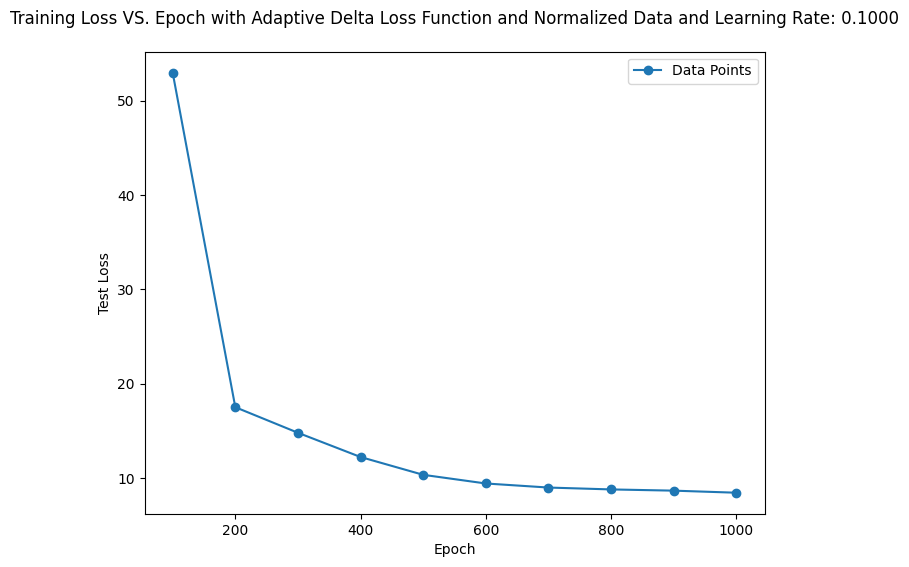

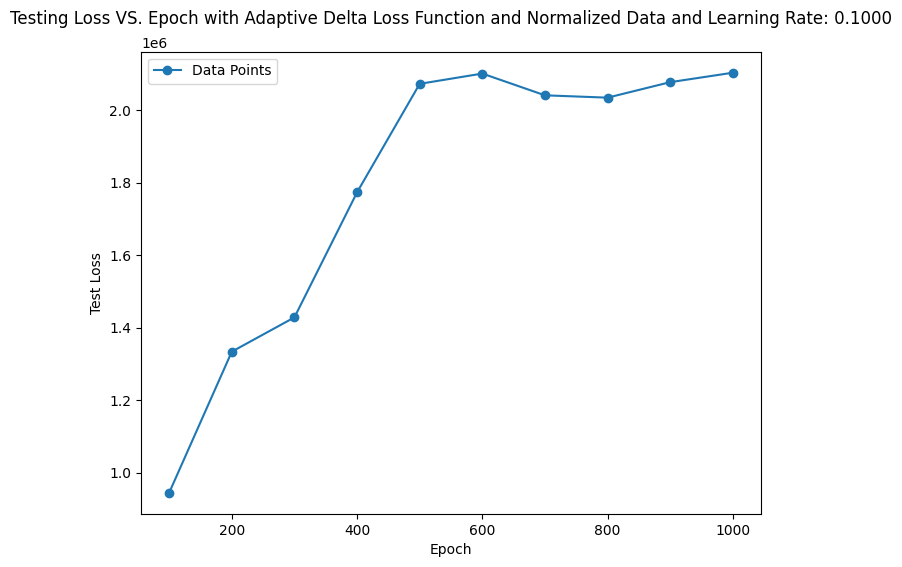

Learning Rate: 0.1000, Test Loss: 21.3176 Train Loss: 8.4450


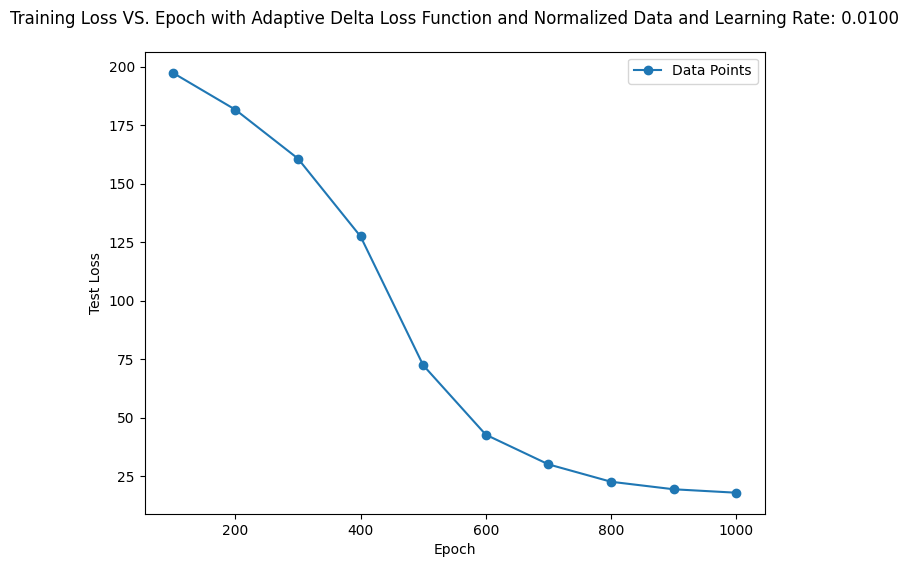

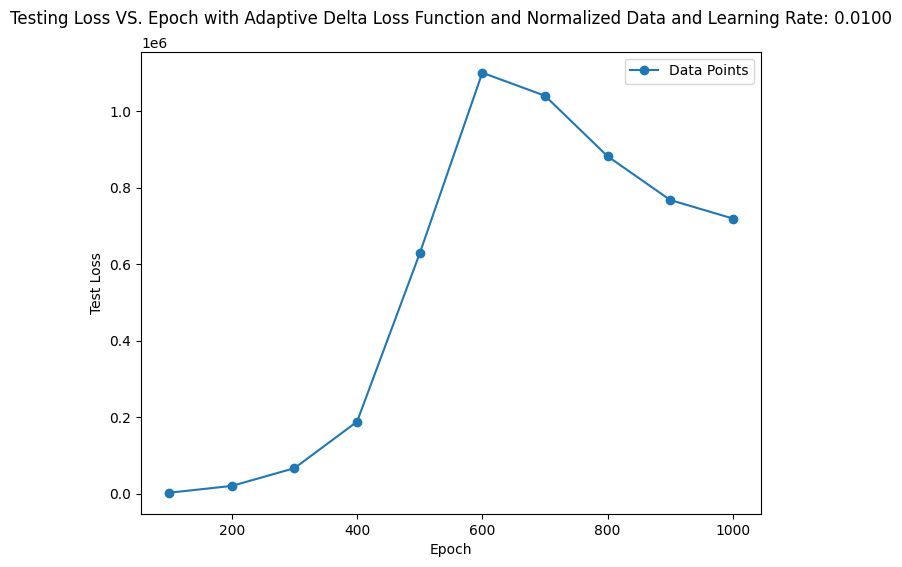

Learning Rate: 0.0100, Test Loss: 19.6066 Train Loss: 18.0296


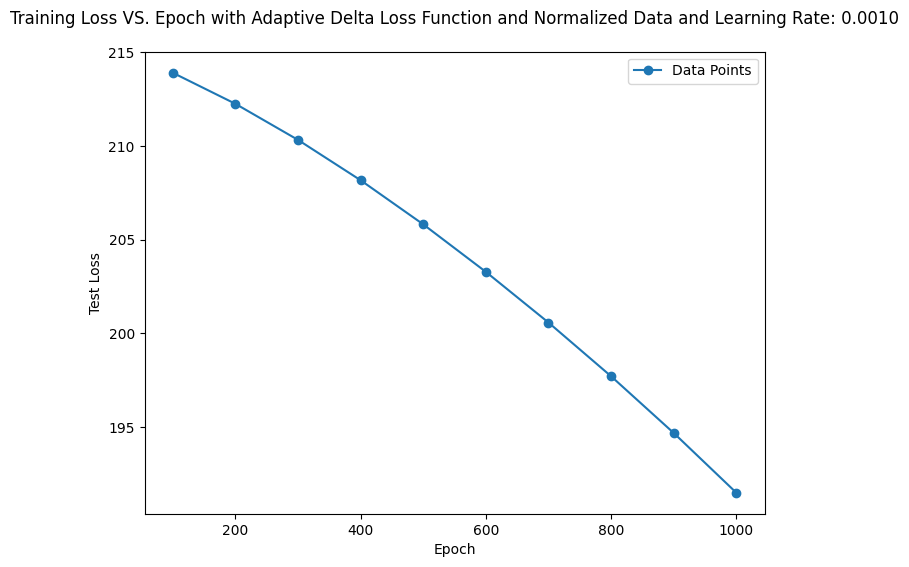

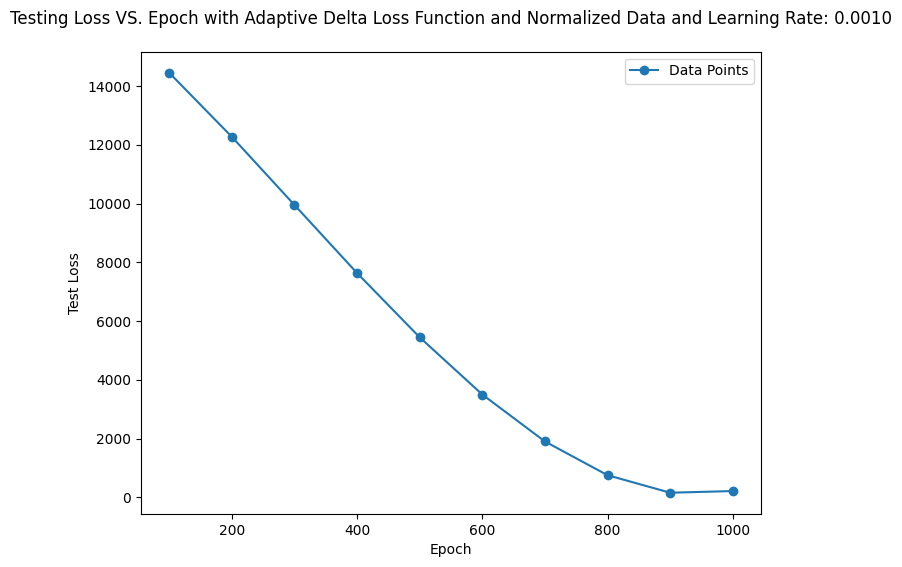

Learning Rate: 0.0010, Test Loss: 216.5475 Train Loss: 191.5000


In [30]:
# Define learning rates to be tested
learning_rates = [0.1, 0.01, 0.001]

# Training loop
for lr in learning_rates:
    # Create the model, loss function, and optimizer
    model = RegressionNet()
    criterion = nn.MSELoss()
    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    train_loss = []
    test_loss = []
    epochs_array = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor_scaled)
        loss = criterion(outputs, y_train_tensor_scaled)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Evaluate on the test set
        if (epoch + 1) % 100 == 0:
            test_outputs = model(X_test_tensor)
            test_loss1 = criterion(test_outputs, y_test_tensor)
            train_loss.append(float(f"{loss.item():.4f}"))
            test_loss.append(float(f"{test_loss1.item():.4f}"))

    plot_XY(epochs_array, train_loss, "Epoch", "Test Loss", f"Training Loss VS. Epoch with Adaptive Delta Loss Function and Normalized Data and Learning Rate: {lr:.4f}", f"Train_Ada_Norm_{lr:.4f}")
    plot_XY(epochs_array, test_loss, "Epoch", "Test Loss", f"Testing Loss VS. Epoch with Adaptive Delta Loss Function and Normalized Data and Learning Rate: {lr:.4f}", f"Test_Ada_Norm_{lr:.4f}")
    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor_scaled)
        test_loss = criterion(test_outputs, y_test_tensor_scaled)
        print("="*50)
        print(f'Learning Rate: {lr:.4f}, Test Loss: {test_loss.item():.4f} Train Loss: {loss.item():.4f}')
        if test_loss is not math.nan and test_loss < best_test_loss:
            best_test_loss = test_loss
            # Save the model checkpoint
            torch.save(model.state_dict(), f'best_model_lr_{lr}.pt')
            loss_name = f"Adaptive Delta Loss Function and Normalized Data and Learning Rate: {lr:.4f}."
            print(f'New best test loss! Model checkpoint saved.')

## Use the best-saved models to report the final test set accuracies for all the configurations

In [31]:
print("="*175 + "\n The Best Test Accuracy: "+str(100.00-best_test_loss.item())+" using the 2 Layer Neural Network with "+loss_name+"\n"+"="*150)

 The Best Test Accuracy: 83.08269500732422 using the 2 Layer Neural Network with Stochastic Gradient Descent Loss Function and Normalized Data with Learning Rate: 0.0010.
